

# **GrabCut Algorithm for Background Removal**

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import dlib
import sys
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **How does Grab Cut Work?**

1. User defines a rectangle

You draw a rectangle around the object you want to extract.
Everything outside this rectangle is immediately considered background.
Everything inside is initially marked as "unknown" because the algorithm doesn’t yet know if it belongs to the object or the background.
2. Labelling pixels

Some pixels are immediately identified as background (outside the rectangle).
Some are tentatively considered foreground (inside the rectangle).
3. Using Gaussian Mixture Model (GMM) for learning

GMM is a statistical model that helps classify pixels based on color similarity.
It looks at the known foreground and background pixels and learns their color patterns.
It then assigns "unknown" pixels as probable foreground or probable background based on how similar they are to the known ones.
4. Building a graph

Think of the image as a network of pixels connected to each other.
Two extra points, called Source (foreground) and Sink (background), are added to represent the two groups.
Every foreground-like pixel is linked to the Source, and background-like pixels are linked to the Sink.
5. Assigning weights (importance) to connections

If two neighboring pixels are very similar in color, they get a strong connection (high weight).
If they are very different, they get a weak connection (low weight).
Pixels also have connections to the Source or Sink, based on how strongly they belong to the foreground or background.
6. Using a Min-Cut algorithm to separate foreground & background

The algorithm finds the best way to "cut" the graph into two parts: foreground and background.
It tries to minimize the total cost of the cut, meaning it will cut at places where the difference between pixels is the highest.
After cutting, all pixels connected to the Source become the foreground (object), and those connected to the Sink become the background.
7. Refining the result

This process repeats, adjusting labels until the classification becomes stable (doesn't change anymore).
The final result is a clean separation of the object from the background.

![](https://docs.opencv.org/3.4/grabcut_scheme.jpg)



In [20]:
# Load our image
image = cv2.imread('sabrina.jpeg')
copy = image.copy()

# Create a mask (of zeros uint8 datatype) that is the same size (width, height) as our original image
mask = np.zeros(image.shape[:2], np.uint8)  # only one channel

# 1x65 matrix required by cv2.grabCut()
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

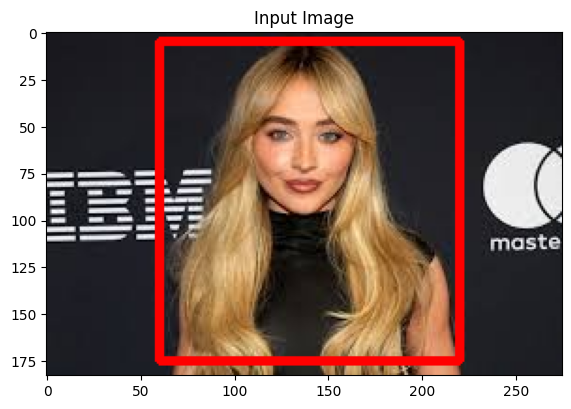

In [21]:
x1, y1, x2, y2 = 60,5,220,175
start = (x1, y1)
end = (x2, y2)

# Format is X,Y,W,H
rect = (x1,y1,x2-x1,y2-y1)

# Show Rectangle
cv2.rectangle(copy, start, end, (0,0,255), 3)
imshow("Input Image", copy)

### GrabCut Segmentation

Segments an object from an image using `cv2.grabCut()`.

### **Process:**
1. **Define a rectangular ROI** containing the object.
2. **Apply `cv2.grabCut()`** to classify pixels as foreground or background.
3. **Create a binary mask** to extract only the foreground.
4. **Multiply the original image with the mask** to isolate the object.

### **Displayed Outputs:**
- **Mask:** Raw segmentation output from GrabCut.
- **Mask2:** Binary mask (foreground = 1, background = 0).
- **Image:** The final segmented result.


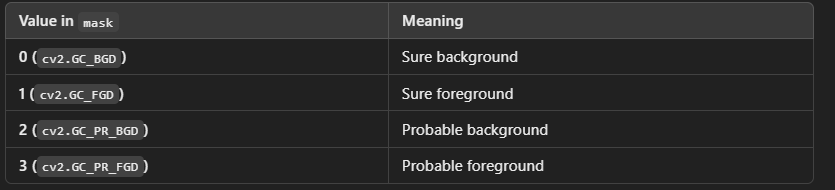

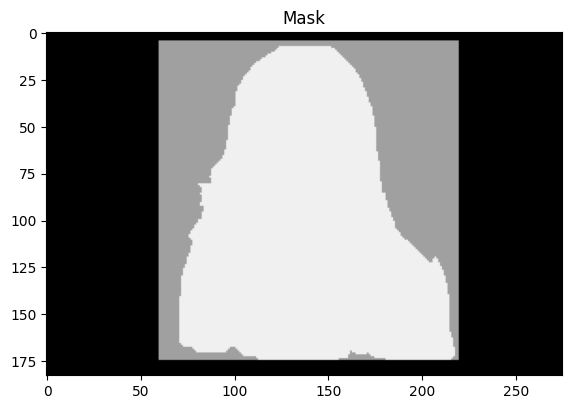

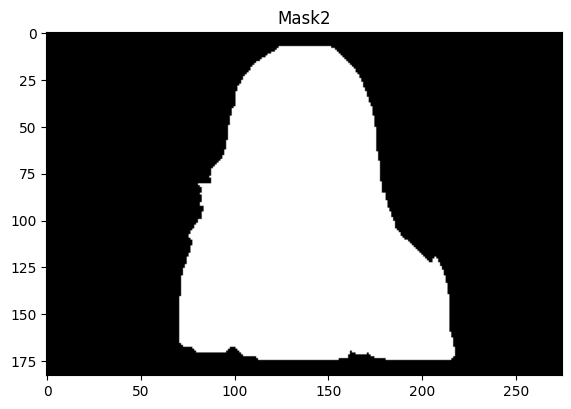

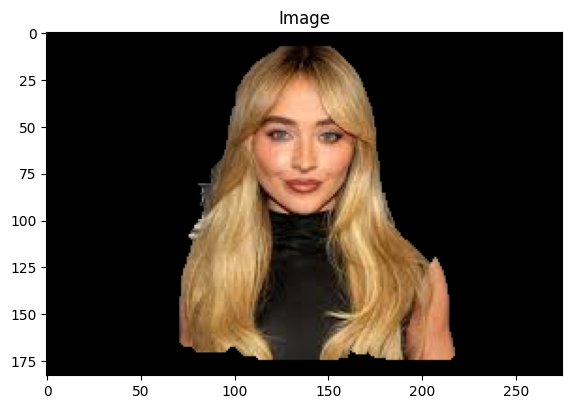

In [22]:
# Grabcut modifies the mask image.
# all 0-pixels and 2-pixels are set to 0 (i.e. background) & all 1-pixels and 3-pixels are set to 1(i.e. foreground pixels).
# Now our final mask is ready. Just multiply it with input image to get the segmented image.

cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)  #After this step, mask is updated

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8') # binary mask created
image = image * mask2[:,:,np.newaxis] # expands the 2D binary mask into 3D
imshow("Mask", mask * 80)
imshow("Mask2", mask2 * 255)
imshow("Image", image)

imshow("Mask", mask * 80)
imshow("Mask2", mask2 * 255)
imshow("Image", image)

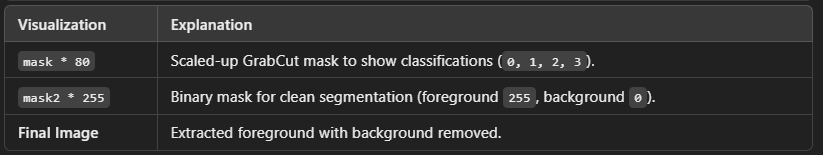